[优先级队列 (堆)](data_structure/heap.md)  

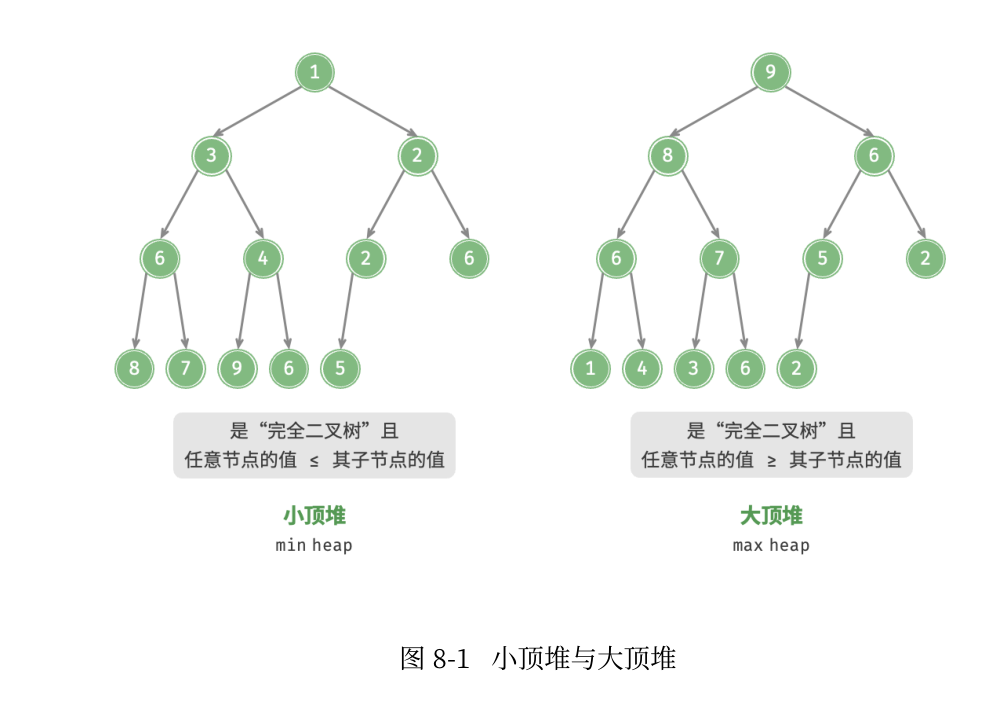

- 这也是一种数据结构，常见的数据结构有二叉树、链表、栈和队列、优先级队列（堆）、并查集、二进制
- 实际上，堆通常用于实现优先队列，大顶堆相当于元素按从大到小的顺序出队的优先队列。
- 优先队列（heap）：只保证堆顶最值，不保证整体有序。
- 应用：第k 个最大元素
- 10 个题


Python 的 heapq 模块默认实现小顶堆

In [10]:
import heapq
k = 3
nums = [4, 5, 8, 2,7,9,5,2,1,2,1,2,1,10]
min_heap = []
for num in nums:
    if len(min_heap) < k:
        heapq.heappush(min_heap,num)
    elif num > min_heap[0]:
        val = heapq.heappushpop(min_heap, num)
        print(val)
    print(min_heap)

[4]
[4, 5]
[4, 5, 8]
[4, 5, 8]
4
[5, 7, 8]
5
[7, 9, 8]
[7, 9, 8]
[7, 9, 8]
[7, 9, 8]
[7, 9, 8]
[7, 9, 8]
[7, 9, 8]
[7, 9, 8]
7
[8, 9, 10]


In [11]:
class KthLargest:
    def __init__(self,k, nums):
        self.k = k
        self.min_heap = []
        for num in nums:
            # 建立堆的过程
            if len(self.min_heap) < self.k:
                heapq.heappush(self.min_heap,num)
            elif num > self.min_heap[0]:
                heapq.heappushpop(self.min_heap, num)
                
    def add(self,val):
        if len(self.min_heap) < self.k:
                heapq.heappush(self.min_heap,val)
        elif val > self.min_heap[0]:
                heapq.heappushpop(self.min_heap, val)
        return self.min_heap[0]
        

堆中方元组的原因

如果堆里放的是元组 (a, b, c)：

先比较 a；

如果 a 相同，再比较 b；

如果 a, b 相同，再比较 c。

In [ ]:
matrix = [[1,5,9],[10,11,13],[12,13,15]]
k = 8

# def kthSmallest(matrix, k):
    
N = len(matrix)
min_heap = []
# 第k个最小，只出现在前k行中
for i in range(min(k,N)):
    # 为什么要这样初始化最小堆
    # 如果值相同，取行靠前的，再则取列靠前的
    min_heap.append((matrix[i][0], i,0))
print(min_heap)
heapq.heapify(min_heap)
min_heap
while k > 0:
    num, row,column = heapq.heappop(min_heap)
    if column < N-1:
        heapq.heappush(min_heap, (matrix[row][column+1], row, column+1))
    k -= 1
num
# 遍历矩阵的同时维护一个最大堆
# return k

[(1, 0, 0), (10, 1, 0), (12, 2, 0)]


13

有利条件，两个数组非递减，那么

思路1：所有对都显示的构造成元组(num1+num2, num1_index, num2_index), 接着弹出次，缺点是，存储空间大

思路2：上述的方案不可取，

什么是 set

在 Python 里：

set 是 集合 数据类型，类似数学里的“集合”。

特点：

- 元素唯一（自动去重）
- 元素无序（不像 list 有顺序）
- 元素必须可哈希（hashable），也就是不可变类型，例如数字、字符串、元组。

方法：
- add
- remove
- | & -, 并，交，差

In [31]:

seen = set()
seen.add((0,0))
seen
seen.add((1,0))
seen
seen.add((0,1))
seen

{(0, 0), (0, 1), (1, 0)}

如果没有 seen 会怎样？

假设我们取出 (i1, i2)，然后同时往右 (i1+1,i2) 和往下 (i1,i2+1) 推。

下一轮如果又从 (i1+1,i2) 出发，也会再推 (i1+1, i2+1)；

从 (i1,i2+1) 出发，也会推 (i1+1, i2+1)。

这样 (i1+1,i2+1) 会被重复入堆，导致：

堆里有很多重复状态，效率下降；

result 里也可能出现重复 pair。

In [32]:
# seen 作用是 记录已经入过堆的下标组合 (i1, i2)
def kSmallestPairs(nums1, nums2, k):
    m,n = len(nums1), len(nums2)
    res = []
    
    min_heap = [(nums1[0]+ nums2[0], 0 ,0)]
    visited = set()
    while min_heap and len(res) < k:
        _, i1,i2 = heapq.heappop(min_heap)
        res.append([nums1[i1],nums2[i2]])
        if i1 < m and (i1+1, i2) not in seen:
            heapq.heappush(min_heap, (nums1[i1+1]+ nums2[i2]), i1+1, i2 )
            visited.add((i1+1, i2))
        if i2 < n and (i1, i2+1) not in seen:
            heapq.heappush(min_heap, (nums1[i1]+ nums2[i2+1]), i1, i2+1 )
            visited.add((i1, i2+1))
    return res